## Polynomsal Regresyon Örneği

### Kütüphanelerin yüklenmesi

In [2]:
# Kütüphaneler
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# uyarıları kapatalım.
import warnings
warnings.filterwarnings("ignore")

# regresyon kütüphneleri
from sklearn.linear_model import LinearRegression    # Doğrusal Regresyon
from sklearn.preprocessing import PolynomialFeatures # Polnomsal Regresyon

### Verilerin Okunması

In [3]:
# veriyi oku
df = pd.read_csv("/DATA/datasets/polinomsal_regresyon_veriseti.csv", sep = ";")
df.head()

,araba_fiyat,araba_max_hiz
0,60,180
1,70,180
2,80,200
3,100,200
4,120,200


In [4]:
# sklearn genelde input olarak numpy kabul eder.
y = df.araba_max_hiz.values.reshape(-1, 1)
x = df.araba_fiyat.values.reshape(-1, 1)

### Verilerin Görselleştirilmesi

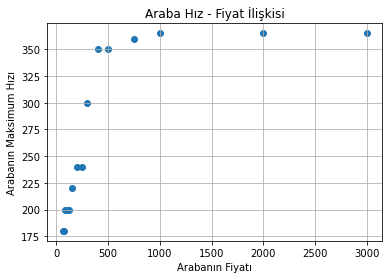

In [5]:
# Veriyi görselleştirelim
plt.scatter(x, y)
plt.ylabel("Arabanın Maksimum Hızı")
plt.xlabel("Arabanın Fiyatı")
plt.title("Araba Hız - Fiyat İlişkisi")
plt.grid(True)
plt.show()

In [6]:
# Doğrusal regresyon deneyelim
lr = LinearRegression()
lr.fit(x, y)

LinearRegression()

### Tahmin ve Doğrusal Regresyon Görseli

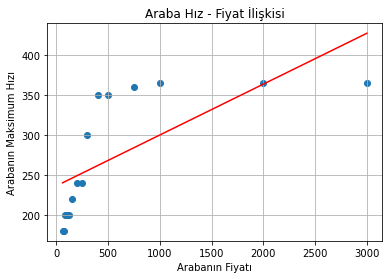

10 bin TL. lik araba hızı tahmini :  [[871.66401826]]


In [7]:
# tahmin ve görsel
y_tahmin = lr.predict(x)

# Görsel
plt.scatter(x, y)
plt.plot(x, y_tahmin, color = "red")
plt.ylabel("Arabanın Maksimum Hızı")
plt.xlabel("Arabanın Fiyatı")
plt.title("Araba Hız - Fiyat İlişkisi")
plt.grid(True)
plt.show()

araba_fiyati = 10000
print("10 bin TL. lik araba hızı tahmini : ", lr.predict((np.array([araba_fiyati]).reshape(1, -1))))

In [8]:
# polinomsal regresyon deneyelim
polinom_regresyon = PolynomialFeatures(degree = 4) # polynom derecesi
x_polinom = polinom_regresyon.fit_transform(x)
x_polinom

array([[1.0000000e+00, 6.0000000e+01, 3.6000000e+03, 2.1600000e+05,
        1.2960000e+07],
       [1.0000000e+00, 7.0000000e+01, 4.9000000e+03, 3.4300000e+05,
        2.4010000e+07],
       [1.0000000e+00, 8.0000000e+01, 6.4000000e+03, 5.1200000e+05,
        4.0960000e+07],
       [1.0000000e+00, 1.0000000e+02, 1.0000000e+04, 1.0000000e+06,
        1.0000000e+08],
       [1.0000000e+00, 1.2000000e+02, 1.4400000e+04, 1.7280000e+06,
        2.0736000e+08],
       [1.0000000e+00, 1.5000000e+02, 2.2500000e+04, 3.3750000e+06,
        5.0625000e+08],
       [1.0000000e+00, 2.0000000e+02, 4.0000000e+04, 8.0000000e+06,
        1.6000000e+09],
       [1.0000000e+00, 2.5000000e+02, 6.2500000e+04, 1.5625000e+07,
        3.9062500e+09],
       [1.0000000e+00, 3.0000000e+02, 9.0000000e+04, 2.7000000e+07,
        8.1000000e+09],
       [1.0000000e+00, 4.0000000e+02, 1.6000000e+05, 6.4000000e+07,
        2.5600000e+10],
       [1.0000000e+00, 5.0000000e+02, 2.5000000e+05, 1.2500000e+08,
        6.25

### Polinomsal Regresyon Modeli Eğitimi

In [10]:
# Eğitelim
lr2 = LinearRegression()
lr2.fit(x_polinom, y)

LinearRegression()

### Modelin Görselleştirilmesi

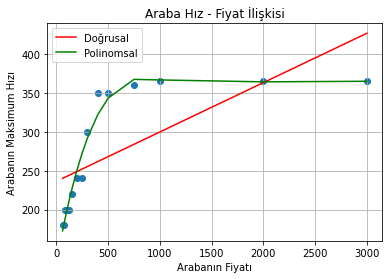

In [12]:
# tahmin görseli 
y_tahmin2 = lr2.predict(x_polinom)

# Görsel
plt.scatter(x, y)
plt.plot(x, y_tahmin, color = "red", label = "Doğrusal")
plt.plot(x, y_tahmin2, color = "green", label = "Polinomsal")
plt.legend()
plt.ylabel("Arabanın Maksimum Hızı")
plt.xlabel("Arabanın Fiyatı")
plt.title("Araba Hız - Fiyat İlişkisi")
plt.grid(True)
plt.show()